# 1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../../../cell2celltrain.csv')
test = pd.read_csv('../../../cell2cellholdout.csv')
train

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [3]:
train.isnull().sum().sort_values(ascending=False)

AgeHH2                       909
AgeHH1                       909
PercChangeMinutes            367
PercChangeRevenues           367
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
ServiceArea                   24
CurrentEquipmentDays           1
Handsets                       1
HandsetModels                  1
OwnsComputer                   0
NonUSTravel                    0
BuysViaMailOrder               0
OptOutMailings                 0
RespondsToMailOffers           0
RetentionCalls                 0
HasCreditCard                  0
IncomeGroup                    0
RetentionOffersAccepted        0
NewCellphoneUser               0
NotNewCellphoneUser            0
ReferralsMadeBySubscriber      0
RVOwner                        0
OwnsMotorcycle                 0
AdjustmentsToCreditRating      0
HandsetPrice                   0
MadeCallTo

# 2. train data Preprocessing

In [4]:
train['Age'] = (train['AgeHH1'] + train['AgeHH2'])/2
test['Age'] = (test['AgeHH1'] + test['AgeHH2'])/2
train.drop(['AgeHH1', 'AgeHH2'], axis=1, inplace=True)
test.drop(['AgeHH1', 'AgeHH2'], axis=1, inplace=True)

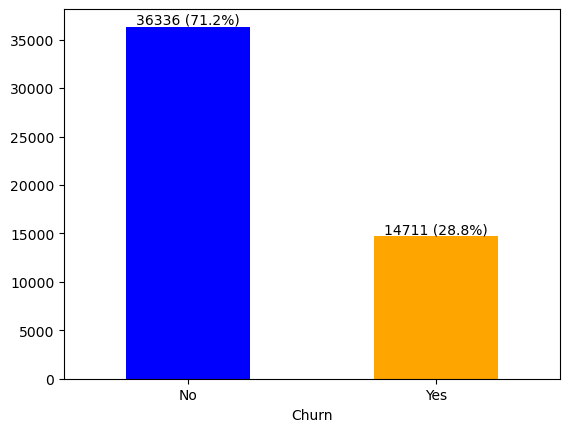

In [5]:
import matplotlib.pyplot as plt
value_counts = train['Churn'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar', color=['blue', 'orange'])

# 각 값의 카운트를 막대 위에 표시
def autolabel_percent(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                f'{height} ({height / value_counts.sum() * 100:.1f}%)',
                ha='center', va='bottom')

autolabel_percent(ax.patches)

plt.xticks(rotation=360)
# 그래프 출력
plt.show()

# 3. Feature Encoding

In [6]:
train = train.drop(["CustomerID"], axis=1)

In [7]:
train1 = train.copy()

In [8]:
import seaborn as sns

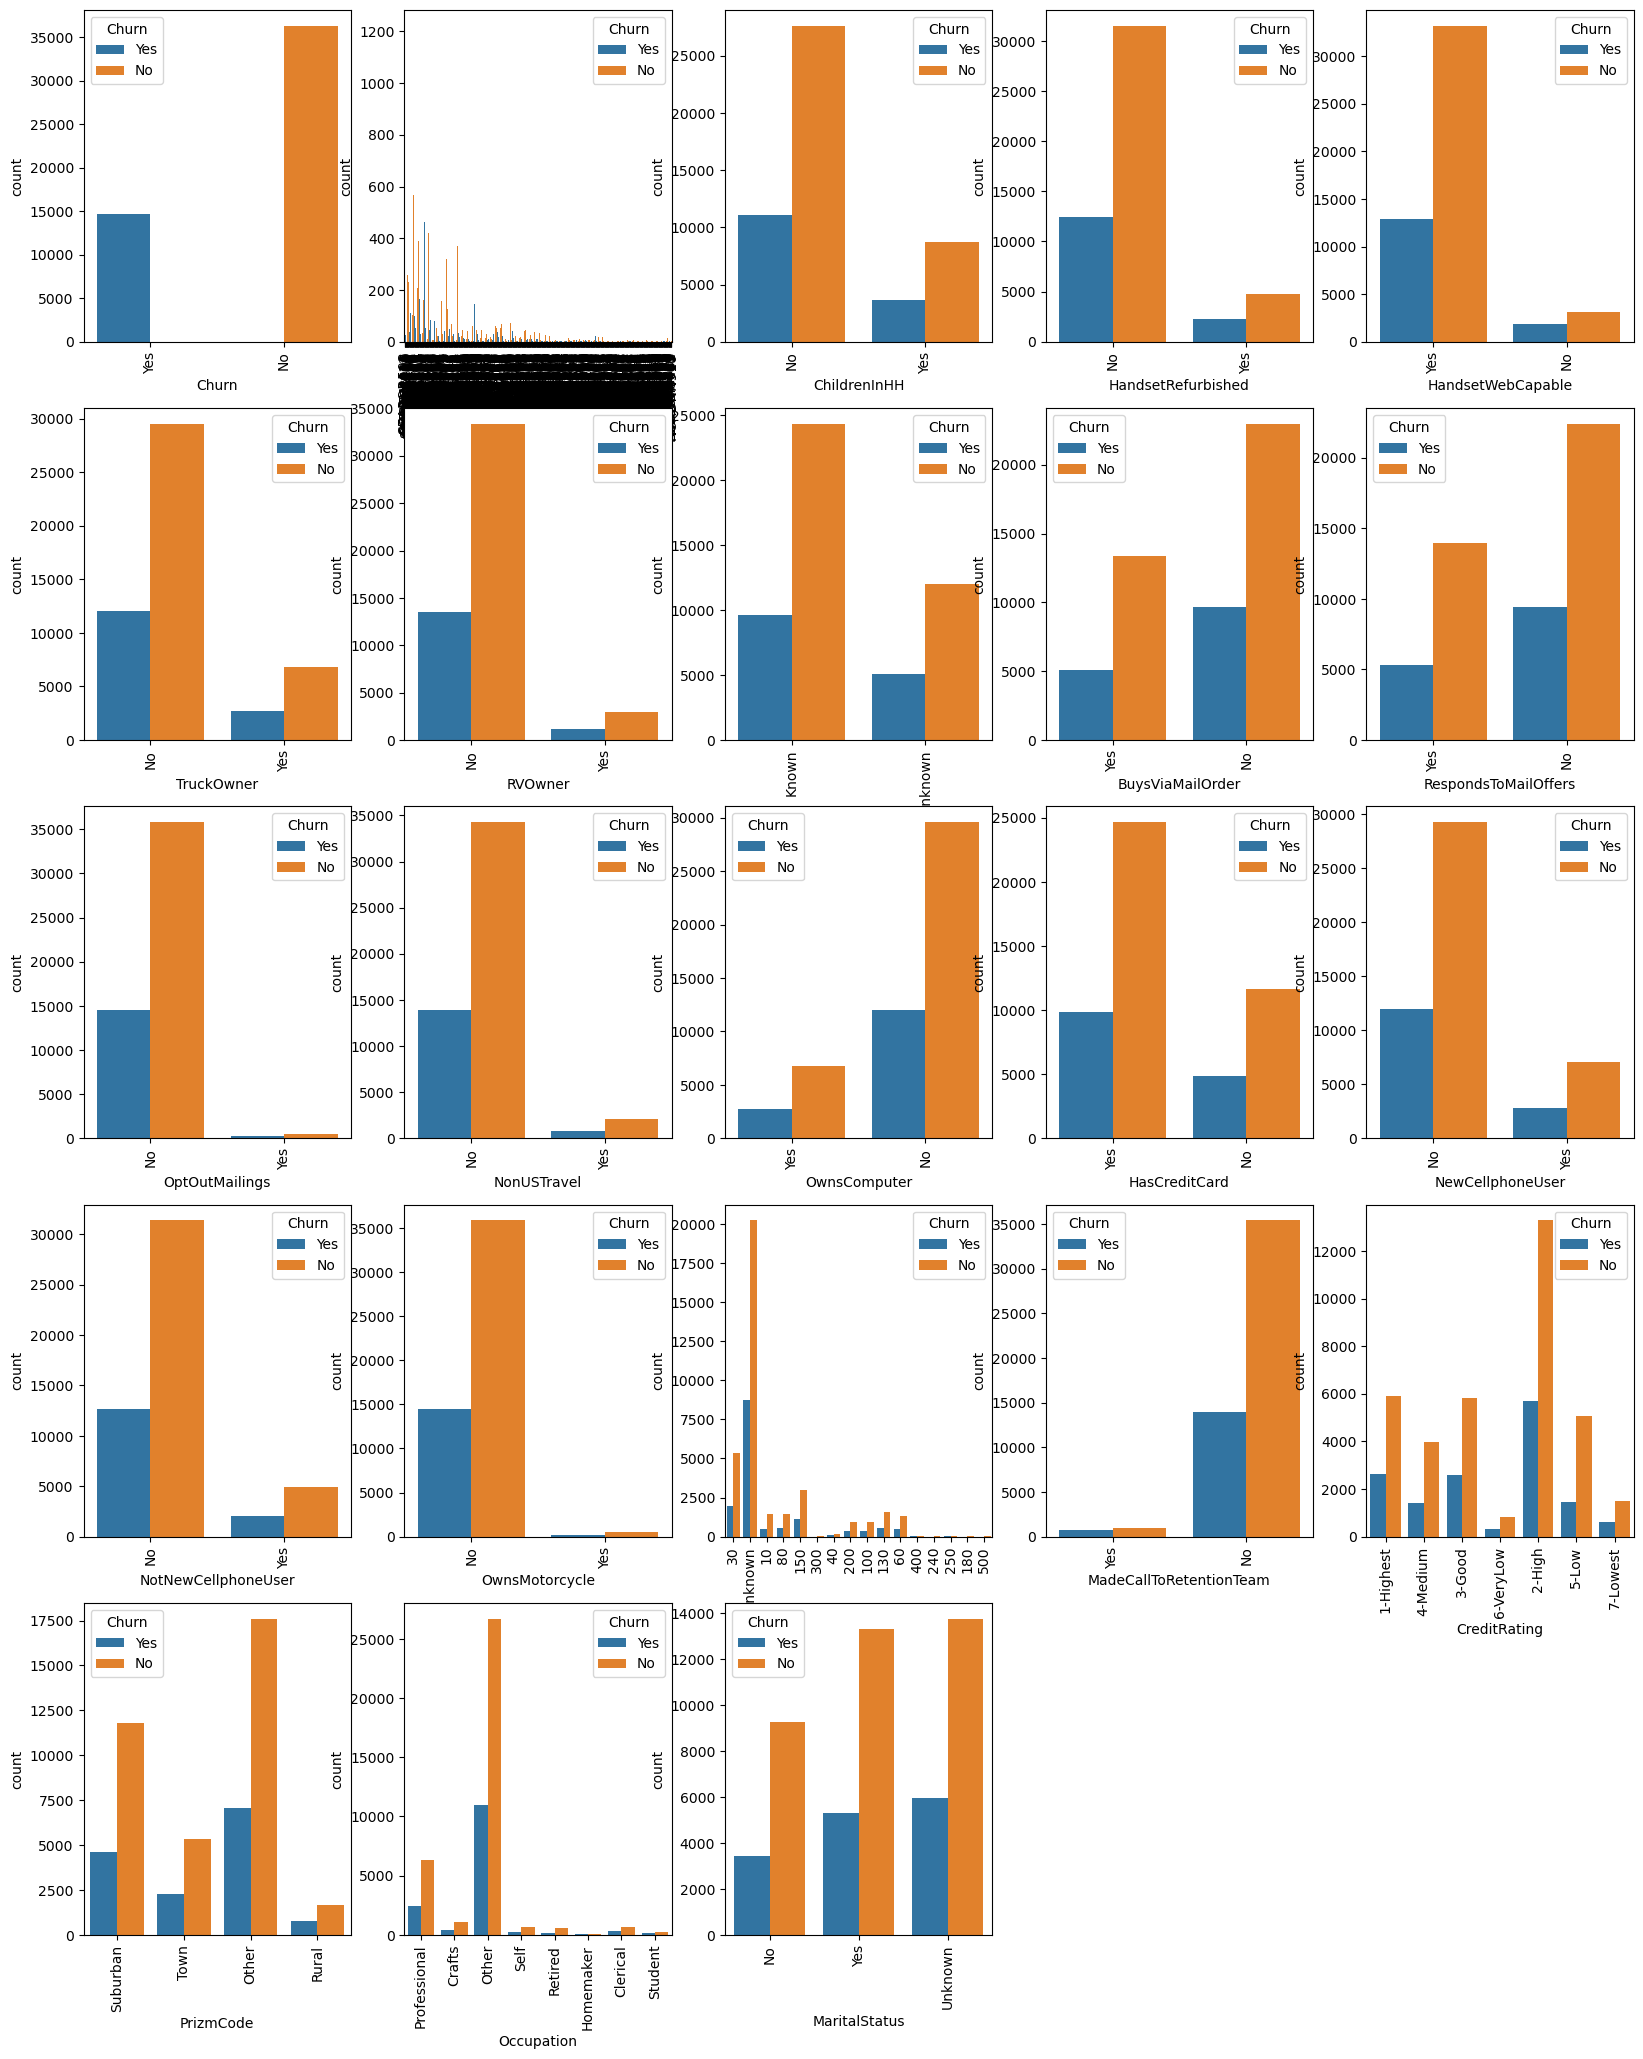

In [9]:
plots_per_row = 5

number_of_plots = train1.select_dtypes(include=['object']).shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row) + (number_of_plots % 5 != 0), plots_per_row)

axes = axes.flatten()

count = 0
for index, col in train1.select_dtypes(include=['object']).columns.to_series().items():
    a = sns.countplot(x=train1[col], hue=train1.Churn, ax=axes[count])
    a.tick_params(axis='x', labelrotation=90)
    count += 1
    
for i in range(1, len(axes) - number_of_plots + 1):
    fig.delaxes(axes[-i]) # 빈 subplot은 삭제
    
fig.set_figwidth(20)
fig.set_figheight(25)
plt.show()

In [10]:
num_col = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
            'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
            'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
            'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs',
            'Handsets', 'CurrentEquipmentDays']

In [11]:
train_eda = train1[num_col]

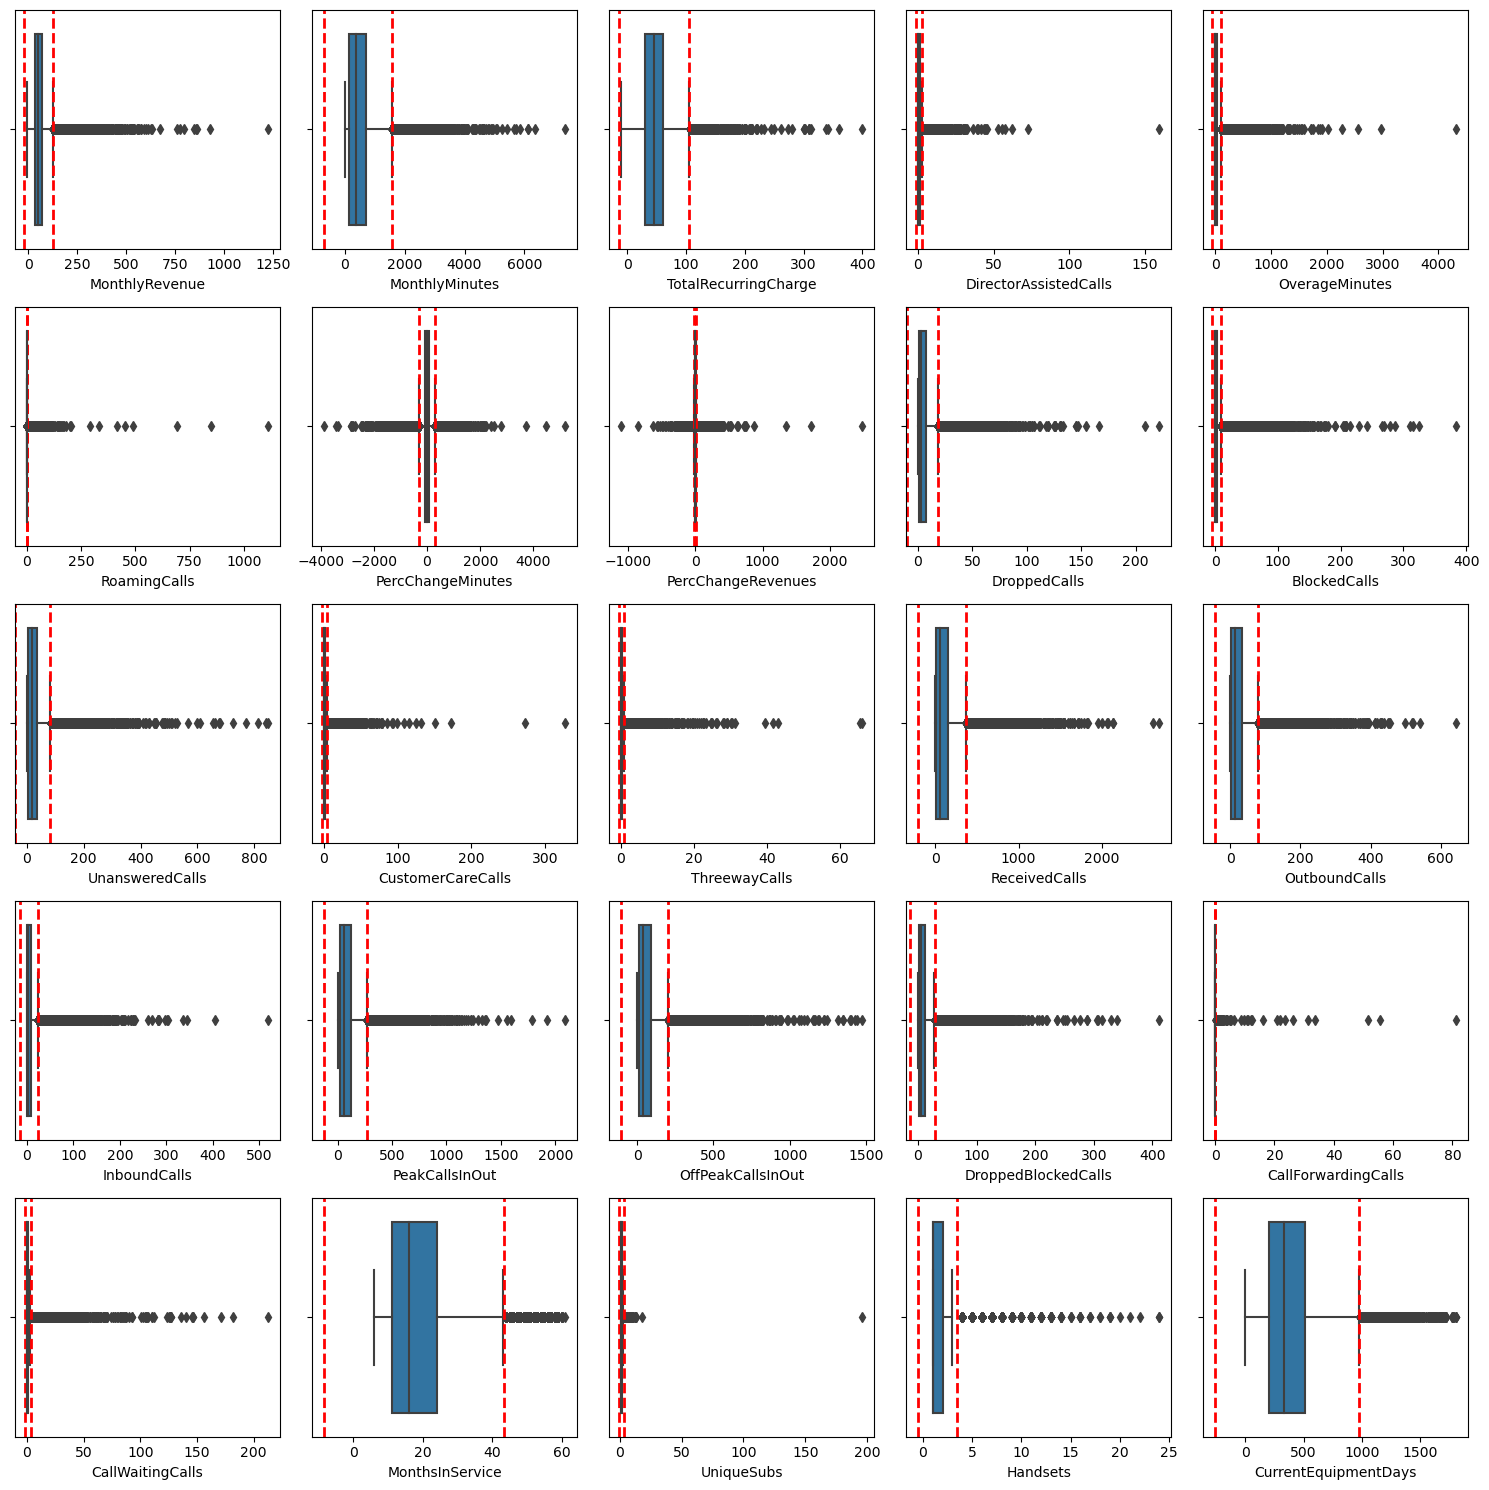

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

num_rows = 5
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(train_eda.columns):
    sns.boxplot(x=train1[column], ax=axes[i])
    
    Q1 = train1[column].quantile(0.25)
    Q3 = train1[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    axes[i].axvline(upper_fence, color='r', linestyle='--', linewidth=2)
    axes[i].axvline(lower_fence, color='r', linestyle='--', linewidth=2)

if len(train_eda.columns) < len(axes):
    for j in range(len(train_eda.columns), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()


<Axes: >

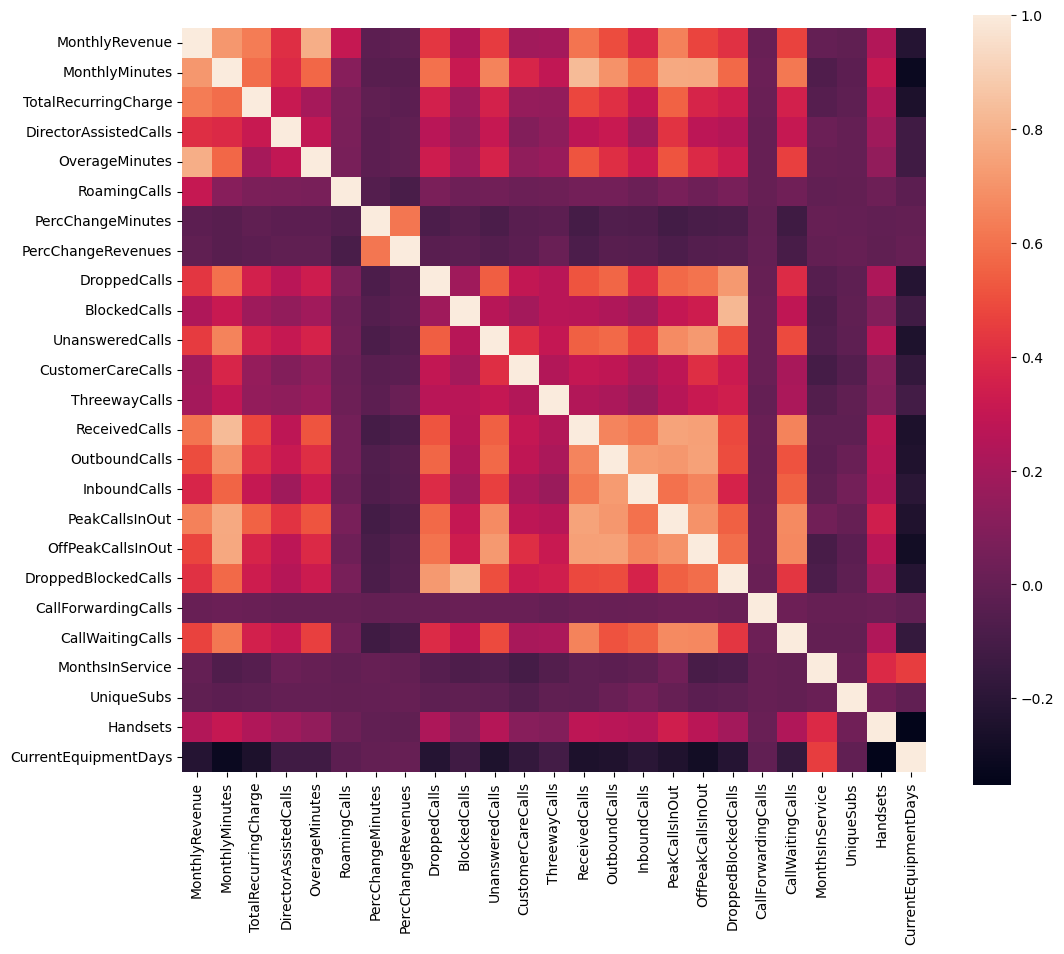

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
cor = train_eda.corr()
sns.heatmap(cor, square = True)

### 결측치 최빈값 및 평균으로 변경

In [14]:

def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == float or df[col].dtype == int:
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
        elif df[col].dtype == object:
            mode = df[col].mode().iloc[0]
            df[col].fillna(mode, inplace=True)
        else:
            continue
        
    return df

train1= fill_missing_values(train1)

### 검정시 null값이 존재하지 않아 0으로 표시 됨.
### null값 있는 상태로 돌리면 값이 표시가 됩니다.

In [15]:
# null(None) 값이 들어있는 데이터 각 컬럼별로 집계
null_rows_selector = train1.isnull().any(axis=1)
null_row_count = train1[null_rows_selector].shape[0]

df_null = train1.isnull().groupby(train1.Churn).sum().transpose()
df_null['total'] = train1.isnull().sum()
df_null['percent'] = (df_null['total'] / len(train1)) * 100
df_null = df_null[df_null.total != 0]

print("rows with null values: ", null_row_count, ", {:.2f}%".format((null_row_count / len(train1) * 100)))
print('columns with null values: ', df_null.shape[0])

df_null

rows with null values:  0 , 0.00%
columns with null values:  0


Churn,No,Yes,total,percent


In [16]:
pd.concat([train1.Churn.value_counts(normalize=True).rename("Overall"), train1[null_rows_selector].Churn.value_counts(normalize=True).rename("within_null_rows")], axis=1)

,Overall,within_null_rows
Churn,,
No,0.711815,NaN
Yes,0.288185,NaN


In [17]:
contingency_table = pd.concat([train1.Churn.value_counts().rename("Overall"), train1[null_rows_selector].Churn.value_counts()
                               .rename("within_null_rows")], axis=1).transpose()
contingency_table

Churn,No,Yes
Overall,36336.0,14711.0
within_null_rows,NaN,NaN


In [18]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_table.values)

# p-value 확인
alpha = 0.05 # 유의값 수준
print("p value is " + str(p))

print("Dependent (reject H0)") if p <= alpha else print("Independent (H0 holds true)")

p value is nan
Independent (H0 holds true)


In [19]:
def chi2test(X, y, alpha=0.05):
    # X: DataFrame
    # y: series
    
    target = y.name
    test_df = []
    for index, col in X.select_dtypes(include=['object']).columns.to_series().items():
        df = pd.concat([y, X[col]], axis=1)
        contingency_table = df.value_counts().rename('counts').reset_index().pivot(index=target, columns=col, values='counts').fillna(0)
        stat, p, dof, expected = chi2_contingency(contingency_table.values)
        test_df.append([target, col, stat, p, 
                      'Dependent (reject H0)' if p <= alpha else 'Independent (H0 holds true)','include' if p <= alpha else 'drop'])
        
    test_df = pd.DataFrame(test_df, columns=["variable1", "variable2", "chi2-stat", "p-value", "result", "recommendation"])
    return test_df

chi2test(train1.drop('Churn', axis=1), train1['Churn'])

,variable1,variable2,chi2-stat,p-value,result,recommendation
0,Churn,ServiceArea,958.314693,2.047260e-07,Dependent (reject H0),include
1,Churn,ChildrenInHH,4.618176,3.163486e-02,Dependent (reject H0),include
2,Churn,HandsetRefurbished,45.595205,1.453971e-11,Dependent (reject H0),include
3,Churn,HandsetWebCapable,196.373257,1.292123e-44,Dependent (reject H0),include
4,Churn,TruckOwner,1.157607,2.819623e-01,Independent (H0 holds true),drop
5,Churn,RVOwner,0.581561,4.457013e-01,Independent (H0 holds true),drop
6,Churn,Homeownership,8.783314,3.039984e-03,Dependent (reject H0),include
7,Churn,BuysViaMailOrder,23.993398,9.666660e-07,Dependent (reject H0),include
8,Churn,RespondsToMailOffers,26.688591,2.390287e-07,Dependent (reject H0),include
9,Churn,OptOutMailings,0.000000,1.000000e+00,Independent (H0 holds true),drop


In [20]:
from scipy.stats import ttest_ind

def t_test(X, y, alpha=0.05):
    target = y.name
    print('t_test with alpha', alpha)
    test_df = []
    for index, col in X.select_dtypes(exclude=['object']).columns.to_series().items():
        df = pd.concat([y, X[col]], axis=1)
        ttest_df = df.set_index(target, drop=True).fillna(0)
        # Perform Welch's t-test
        stat, p = ttest_ind(ttest_df.loc["Yes"], ttest_df.loc["No"], equal_var=False)
        test_df.append([target, col, stat, p,
                     'Dependent (reject H0)' if p <= alpha else 'Independent (H0 holds true)', 'include' if p <= alpha else 'drop'])

    test_df = pd.DataFrame(test_df, columns=['variable1', 'variable2', 't-test', 'p-value', 'result', 'recommendation'])
    return test_df

t_test(train1.drop('Churn', axis=1), train1['Churn'])


t_test with alpha 0.05


,variable1,variable2,t-test,p-value,result,recommendation
0,Churn,MonthlyRevenue,[-2.7041735239164155],[0.0068517019724790166],Dependent (reject H0),include
1,Churn,MonthlyMinutes,[-11.649535239052467],[2.709680772271761e-31],Dependent (reject H0),include
2,Churn,TotalRecurringCharge,[-14.138955529513712],[3.1085470362701373e-45],Dependent (reject H0),include
3,Churn,DirectorAssistedCalls,[-4.740581961642793],[2.1401474114644415e-06],Dependent (reject H0),include
4,Churn,OverageMinutes,[3.792674867892243],[0.00014934039181790478],Dependent (reject H0),include
5,Churn,RoamingCalls,[2.273162002897592],[0.023025441869588808],Dependent (reject H0),include
6,Churn,PercChangeMinutes,[-7.492439280873927],[6.977321679000184e-14],Dependent (reject H0),include
7,Churn,PercChangeRevenues,[2.255528475481255],[0.024109801364197672],Dependent (reject H0),include
8,Churn,DroppedCalls,[-3.5273600982343885],[0.00042039591089024496],Dependent (reject H0),include
9,Churn,BlockedCalls,[-1.2668362619480196],[0.20522435968477423],Independent (H0 holds true),drop


### include recommendation이 된 컬럼만 선정하여 train2 재 정의

In [21]:
train2 = train1[['ChildrenInHH', 'HandsetRefurbished','HandsetWebCapable', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'HandsetPrice', 'MadeCallToRetentionTeam',
                'CreditRating', 'PrizmCode', 'MaritalStatus', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes',
                'PercChangeRevenues', 'DroppedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
                'DroppedBlockedCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted',
                'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'Age','Churn']]

In [22]:
train2.to_csv('train2.csv', index=False)

In [23]:
binary_cols = ['ChildrenInHH', 'HandsetRefurbished','HandsetWebCapable', 'BuysViaMailOrder',
               'RespondsToMailOffers', 'HandsetPrice', 'MadeCallToRetentionTeam','Churn']
for i in binary_cols :
    train2[i] = train2[i].replace({'Yes' : 1, 'No' : 0})

train2['Homeownership'] = train2['Homeownership'].replace({"Known" : 1, "Unknown" : 0})

/var/folders/jr/r32rns2x2dd3llvsz29fhf9m0000gn/T/ipykernel_2547/3479082451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2[i] = train2[i].replace({'Yes' : 1, 'No' : 0})
/var/folders/jr/r32rns2x2dd3llvsz29fhf9m0000gn/T/ipykernel_2547/3479082451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['Homeownership'] = train2['Homeownership'].replace({"Known" : 1, "Unknown" : 0})


In [24]:
train2

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,Homeownership,BuysViaMailOrder,RespondsToMailOffers,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,...,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age,Churn
0,0,0,1,1,1,1,30,1,1-Highest,Suburban,...,2.0,2.0,361.0,1,0,0,4,0,31.0,1
1,1,0,0,1,1,1,30,0,4-Medium,Suburban,...,2.0,1.0,1504.0,0,0,0,5,0,41.0,1
2,1,0,0,0,0,0,Unknown,0,3-Good,Town,...,1.0,1.0,1812.0,0,0,0,6,0,26.0,0
3,0,0,1,1,1,1,10,0,4-Medium,Other,...,9.0,4.0,458.0,0,0,0,6,0,15.0,0
4,0,0,0,1,1,1,10,0,1-Highest,Other,...,4.0,3.0,852.0,0,0,0,9,1,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,0,1,1,1,1,1,60,0,1-Highest,Suburban,...,2.0,2.0,526.0,0,0,0,6,0,66.0,1
51043,1,0,1,1,1,1,60,0,3-Good,Other,...,2.0,2.0,464.0,0,0,0,9,1,48.0,0
51044,0,0,1,1,0,0,80,0,5-Low,Other,...,3.0,2.0,378.0,0,0,0,7,1,18.0,1
51045,1,0,1,0,0,0,30,0,5-Low,Other,...,2.0,2.0,433.0,0,0,0,9,0,16.0,0


In [25]:
train_cat = train2[['CreditRating', 'PrizmCode', 'MaritalStatus']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_train_cat = train_cat.apply(le.fit_transform)

In [26]:
le_train_cat

,CreditRating,PrizmCode,MaritalStatus
0,0,2,0
1,3,2,2
2,2,3,2
3,3,0,0
4,0,0,2
...,...,...,...
51042,0,2,2
51043,2,0,0
51044,4,0,0
51045,4,0,0


In [27]:
train2[['CreditRating', 'PrizmCode', 'MaritalStatus']] = le_train_cat[['CreditRating', 'PrizmCode', 'MaritalStatus']]

/var/folders/jr/r32rns2x2dd3llvsz29fhf9m0000gn/T/ipykernel_2547/2791173126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2[['CreditRating', 'PrizmCode', 'MaritalStatus']] = le_train_cat[['CreditRating', 'PrizmCode', 'MaritalStatus']]


In [28]:
train2

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,Homeownership,BuysViaMailOrder,RespondsToMailOffers,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,...,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age,Churn
0,0,0,1,1,1,1,30,1,0,2,...,2.0,2.0,361.0,1,0,0,4,0,31.0,1
1,1,0,0,1,1,1,30,0,3,2,...,2.0,1.0,1504.0,0,0,0,5,0,41.0,1
2,1,0,0,0,0,0,Unknown,0,2,3,...,1.0,1.0,1812.0,0,0,0,6,0,26.0,0
3,0,0,1,1,1,1,10,0,3,0,...,9.0,4.0,458.0,0,0,0,6,0,15.0,0
4,0,0,0,1,1,1,10,0,0,0,...,4.0,3.0,852.0,0,0,0,9,1,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,0,1,1,1,1,1,60,0,0,2,...,2.0,2.0,526.0,0,0,0,6,0,66.0,1
51043,1,0,1,1,1,1,60,0,2,0,...,2.0,2.0,464.0,0,0,0,9,1,48.0,0
51044,0,0,1,1,0,0,80,0,4,0,...,3.0,2.0,378.0,0,0,0,7,1,18.0,1
51045,1,0,1,0,0,0,30,0,4,0,...,2.0,2.0,433.0,0,0,0,9,0,16.0,0


In [29]:
import numpy as np

# Calculate the mean of HandsetPrice excluding the 'Unknown' values
mean_price = train2.loc[train2['HandsetPrice'] != 'Unknown', 'HandsetPrice'].astype(float).mean()

# Replace 'Unknown' values with the mean price
train2.loc[train2['HandsetPrice'] == 'Unknown', 'HandsetPrice'] = mean_price



In [30]:
cor = train2.corr()

abs_correlation_with_churn = cor['Churn'].abs().sort_values(ascending=False)

for column, correlation in abs_correlation_with_churn.items():
    if column != 'Churn':
        print(f"'{column}': {correlation}")

'CurrentEquipmentDays': 0.1036874015428015
'MadeCallToRetentionTeam': 0.06739314671419709
'RetentionCalls': 0.06530063726408082
'HandsetWebCapable': 0.0620962188050375
'TotalRecurringCharge': 0.06117146522932769
'MonthlyMinutes': 0.05006399861572827
'CreditRating': 0.044750094869634785
'OffPeakCallsInOut': 0.040783780171258555
'HandsetModels': 0.04004734810769068
'PeakCallsInOut': 0.04002890706579177
'ReceivedCalls': 0.037452800090243585
'CustomerCareCalls': 0.035509879238917054
'RetentionOffersAccepted': 0.03495335051443715
'UniqueSubs': 0.03452223565240581
'InboundCalls': 0.03423242192280207
'PercChangeMinutes': 0.03400785472830186
'Handsets': 0.03284535752587374
'OutboundCalls': 0.03227612075144681
'HandsetRefurbished': 0.02994898968796429
'UnansweredCalls': 0.029350162765353637
'Age': 0.025927596249893325
'CallWaitingCalls': 0.025652577782318182
'ThreewayCalls': 0.023854164611368446
'RespondsToMailOffers': 0.022909974940587278
'BuysViaMailOrder': 0.021725089408201118
'DirectorAssis

In [31]:
len(train2.columns)

43

In [32]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
train2_ss = pd.DataFrame(scaler.fit_transform(train2), columns=train2.columns)

train2_ss.head(1)

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,Homeownership,BuysViaMailOrder,RespondsToMailOffers,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,...,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age,Churn
0,-0.565473,-0.401647,0.329558,0.708489,1.329145,1.286508,-1.31546,5.315383,-1.19176,0.736117,...,0.146005,0.487076,-0.077014,4.662897,-0.1283,-0.169283,-0.103411,-0.140707,0.228001,1.57162


### 이상치 제거 IsolationForest

In [33]:
from sklearn.ensemble import IsolationForest
import collections

# n_estimators : 노드 수 (50 - 100사이의 숫자면 적당하다.)
# max_samples : 샘플링 수
# contamination : 이상치 비율
# max_features : 사용하고자 하는 독립변수 수 (1이면 전부 사용)
# random_state : seed를 일정하게 유지시켜줌(if None, the random number generator is the RandomState instance used by np.random)
# n_jobs : CPU 병렬처리 유뮤(1이면 안하는 것으로 디버깅에 유리. -1을 넣으면 multilple CPU를 사용하게 되어 메모리 사용량이 급격히 늘어날 수 있다.)

clf_ss = IsolationForest(n_estimators=100,
                      max_samples="auto", 
                      contamination=0.01,
                      max_features=1,
                      bootstrap=False,
                      n_jobs=1,
                      random_state=None,
                      verbose=0)

# fit 함수를 이용하여, 데이터셋을 학습시킨다.
clf_ss.fit(train2_ss)

# predict 함수를 이용하여, outlier를 판별해 준다. 0과 1로 이루어진 Series형태의 데이터가 나온다.
y_pred_outliers = clf_ss.predict(train2_ss)

# 이상치의 개수를 Count하는 과정
collections.Counter(y_pred_outliers)

# 원래의 DataFrame에 붙히기. out행의 값이 -1인 것을 제거하면 이상치가 제거된 DataFrame을 얻을 수 있다.
train2_ss['out']=y_pred_outliers
outliers=train2_ss.loc[train2_ss['out']== -1]
outlier_index=list(outliers.index)

/Users/xavierwonkeunjung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


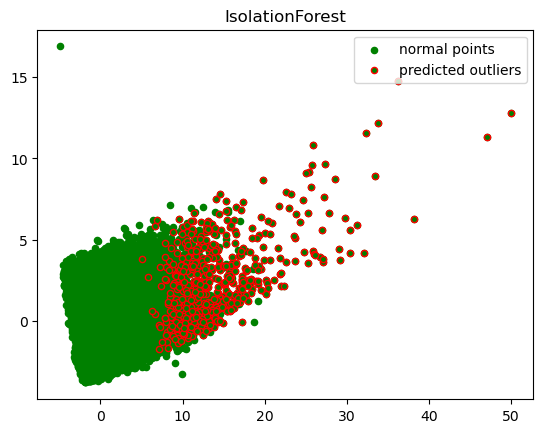

In [34]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(train2_ss)
res=pd.DataFrame(pca.transform(train2_ss))
Z = np.array(res)
plt.title("IsolationForest")
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [35]:
train_ss = train2_ss[train2_ss['out'] != -1]

In [36]:
train_ss['Churn'] = train2["Churn"]

/var/folders/jr/r32rns2x2dd3llvsz29fhf9m0000gn/T/ipykernel_2547/4203054083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ss['Churn'] = train2["Churn"]


In [37]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = train_ss.drop('Churn', axis=1)
y = train_ss['Churn']

# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=70)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the balanced data
train_ss_ov = pd.concat([X_resampled, y_resampled], axis=1)

### oversampling

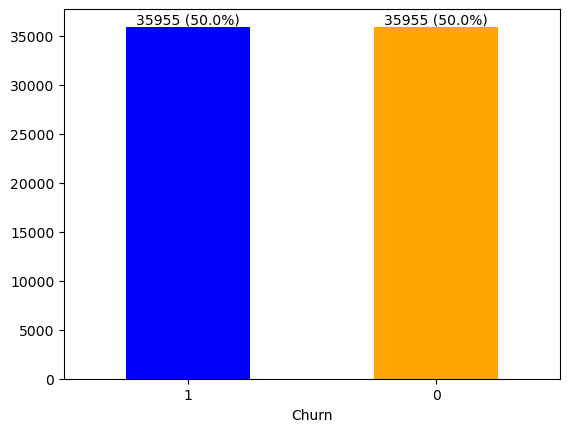

In [38]:
import matplotlib.pyplot as plt
value_counts = train_ss_ov['Churn'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar', color=['blue', 'orange'])

# 각 값의 카운트를 막대 위에 표시
def autolabel_percent(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                f'{height} ({height / value_counts.sum() * 100:.1f}%)',
                ha='center', va='bottom')

autolabel_percent(ax.patches)

plt.xticks(rotation=360)
# 그래프 출력
plt.show()

# 4. 데이터 나누기

In [39]:
from sklearn.model_selection import train_test_split
y = train_ss_ov['Churn']
X = train_ss_ov.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [40]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (50337, 43)
Y train shape:  (50337,)
X test shape:  (21573, 43)
Y test shape:  (21573,)


### 각 수치 보여주는 함수
### 수치를 데이터프레임에 담아주는 함수

In [41]:
def report(y_test, pred):

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    # Accuracy
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy:", accuracy)

    # Precision
    precision = precision_score(y_test, pred)
    print("Precision:", precision)

    # Recall
    recall = recall_score(y_test, pred)
    print("Recall:", recall)

    # F1 Score
    f1 = f1_score(y_test, pred)
    print("F1 Score:", f1)

    # Specificity (True Negative Rate)
    tn = ((y_test == 0) & (pred == 0)).sum()
    fp = ((y_test == 0) & (pred == 1)).sum()
    specificity = tn / (tn + fp)
    print("Specificity:", specificity)


In [42]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity'])

# Function to add results to the DataFrame
def df_add(model_name, y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    tn = ((y_test == 0) & (pred == 0)).sum()
    fp = ((y_test == 0) & (pred == 1)).sum()
    specificity = tn / (tn + fp)

    results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1, specificity]

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=70, max_depth=4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.6043202150836694

In [44]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': range(4, 101, 4)
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)
grid_cv.fit(X_train, y_train)
best_model = grid_cv.best_estimator_
best_pred = best_model.predict(X_test)

,Model,Accuracy,Precision,Recall,F1 Score,Specificity


In [59]:
report(y_test, grid_cv.best_estimator_.predict(X_test))

Accuracy: 0.6929958744727205
Precision: 0.6973832831325302
Recall: 0.6849403716372376
F1 Score: 0.6911058252879997
Specificity: 0.7010970621048717


In [60]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

In [61]:
from sklearn.model_selection import KFold, cross_val_score, KFold

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=70, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train,
                                 cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.8014383073218732 0.0023612155980396315
DecisionTreeClassifier 0.6895923040696859 0.0038339332199442146
AdaBoostClassifier 0.7128354565531322 0.003757080280457945
GradientBoostingClassifier 0.7852672375181634 0.005039635158755129
LogisticRegression 0.5904404889307591 0.001912108044535857


In [62]:
for name, model in models:
    kfold = KFold(n_splits=5, random_state=70, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # Perform predictions on the test set
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Print model name and evaluation metrics
    print(name)
    report(y_test, pred)

    # Add evaluation metrics to the DataFrame
    df_add(name, y_test, pred)
results_df

RandomForestClassifier
Accuracy: 0.8053121958003059
Precision: 0.8573280051841452
Recall: 0.733844873809744
F1 Score: 0.790794979079498
Specificity: 0.8771848270732614
DecisionTreeClassifier
Accuracy: 0.6935984795809577
Precision: 0.693745970341715
Recall: 0.6963113617454008
F1 Score: 0.6950262987911785
Specificity: 0.6908702119747118
AdaBoostClassifier
Accuracy: 0.7070412089185556
Precision: 0.7174354511169132
Recall: 0.6858648423777387
F1 Score: 0.7012950184327441
Specificity: 0.7283376719970249
GradientBoostingClassifier
Accuracy: 0.7849163305984332
Precision: 0.8863039399624766
Recall: 0.6550799667190533
F1 Score: 0.7533489262173081
Specificity: 0.9154890293789513
LogisticRegression
Accuracy: 0.5867983127056969
Precision: 0.5859297390047864
Recall: 0.5997966164370898
F1 Score: 0.5927820922795798
Specificity: 0.573726292301971


,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,RandomForestClassifier,0.805312,0.857328,0.733845,0.790795,0.877185
1,DecisionTreeClassifier,0.693598,0.693746,0.696311,0.695026,0.690870
2,AdaBoostClassifier,0.707041,0.717435,0.685865,0.701295,0.728338
3,GradientBoostingClassifier,0.784916,0.886304,0.655080,0.753349,0.915489
4,LogisticRegression,0.586798,0.585930,0.599797,0.592782,0.573726


In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, pred)

df_add('KNeighborsClassifier', y_test, pred)
print(accuracy_score(y_test, pred))
results_df


0.672090112640801


,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,RandomForestClassifier,0.805312,0.857328,0.733845,0.790795,0.877185
1,DecisionTreeClassifier,0.693598,0.693746,0.696311,0.695026,0.690870
2,AdaBoostClassifier,0.707041,0.717435,0.685865,0.701295,0.728338
3,GradientBoostingClassifier,0.784916,0.886304,0.655080,0.753349,0.915489
4,LogisticRegression,0.586798,0.585930,0.599797,0.592782,0.573726
5,KNeighborsClassifier,0.672090,0.628493,0.846261,0.721299,0.496932


In [65]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5345 5411]
 [1663 9154]]
              precision    recall  f1-score   support

           0       0.76      0.50      0.60     10756
           1       0.63      0.85      0.72     10817

    accuracy                           0.67     21573
   macro avg       0.70      0.67      0.66     21573
weighted avg       0.70      0.67      0.66     21573



In [66]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,RandomForestClassifier,0.805312,0.857328,0.733845,0.790795,0.877185
1,DecisionTreeClassifier,0.693598,0.693746,0.696311,0.695026,0.690870
2,AdaBoostClassifier,0.707041,0.717435,0.685865,0.701295,0.728338
3,GradientBoostingClassifier,0.784916,0.886304,0.655080,0.753349,0.915489
4,LogisticRegression,0.586798,0.585930,0.599797,0.592782,0.573726
5,KNeighborsClassifier,0.672090,0.628493,0.846261,0.721299,0.496932


In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings

warnings.filterwarnings('ignore')

In [68]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=70)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('ACC : ', accuracy_score(y_test, gb_pred))
print('Fit time : ', time.time() - start_time)

ACC :  0.7849163305984332
Fit time :  19.353223085403442


In [69]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

start_time = time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
df_add('GradientBoostingClassifier', y_test, grid.best_estimator_.predict(X_test))
print('Fit time : ', time.time() - start_time)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Fit time :  153.9567370414734


In [70]:
report(y_test, grid.best_estimator_.predict(X_test))

Accuracy: 0.799749687108886
Precision: 0.9210628645495788
Recall: 0.6569289082000555
F1 Score: 0.7668897042952729
Specificity: 0.9433804388248419


In [71]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,RandomForestClassifier,0.805312,0.857328,0.733845,0.790795,0.877185
1,DecisionTreeClassifier,0.693598,0.693746,0.696311,0.695026,0.690870
2,AdaBoostClassifier,0.707041,0.717435,0.685865,0.701295,0.728338
3,GradientBoostingClassifier,0.784916,0.886304,0.655080,0.753349,0.915489
4,LogisticRegression,0.586798,0.585930,0.599797,0.592782,0.573726
5,KNeighborsClassifier,0.672090,0.628493,0.846261,0.721299,0.496932
6,GradientBoostingClassifier,0.799750,0.921063,0.656929,0.766890,0.943380


In [72]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  4.408247947692871


In [73]:
evals = [(X_train, y_train)]

start_time = time.time()
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals)
df_add('XGBoostClassifier', y_test, xgb.predict(X_test))

[0]	validation_0-logloss:0.68557
[1]	validation_0-logloss:0.67879
[2]	validation_0-logloss:0.67320
[3]	validation_0-logloss:0.66781
[4]	validation_0-logloss:0.66331
[5]	validation_0-logloss:0.65909
[6]	validation_0-logloss:0.65606
[7]	validation_0-logloss:0.65250
[8]	validation_0-logloss:0.64886
[9]	validation_0-logloss:0.64185
[10]	validation_0-logloss:0.63900
[11]	validation_0-logloss:0.63481
[12]	validation_0-logloss:0.62835
[13]	validation_0-logloss:0.62514
[14]	validation_0-logloss:0.62285
[15]	validation_0-logloss:0.61959
[16]	validation_0-logloss:0.61505
[17]	validation_0-logloss:0.61282
[18]	validation_0-logloss:0.60978
[19]	validation_0-logloss:0.60790
[20]	validation_0-logloss:0.60614
[21]	validation_0-logloss:0.60263
[22]	validation_0-logloss:0.60014
[23]	validation_0-logloss:0.59801
[24]	validation_0-logloss:0.59560
[25]	validation_0-logloss:0.59167
[26]	validation_0-logloss:0.58670
[27]	validation_0-logloss:0.58400
[28]	validation_0-logloss:0.58206
[29]	validation_0-loglos

In [74]:
report(y_test, grid.best_estimator_.predict(X_test))

Accuracy: 0.799749687108886
Precision: 0.9210628645495788
Recall: 0.6569289082000555
F1 Score: 0.7668897042952729
Specificity: 0.9433804388248419


In [75]:
from lightgbm import LGBMClassifier
evals = [(X_train, y_train)]
start_time = time.time()
lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals)

[1]	training's binary_logloss: 0.67389
[2]	training's binary_logloss: 0.656781
[3]	training's binary_logloss: 0.644346
[4]	training's binary_logloss: 0.632229
[5]	training's binary_logloss: 0.620666
[6]	training's binary_logloss: 0.611037
[7]	training's binary_logloss: 0.600576
[8]	training's binary_logloss: 0.589083
[9]	training's binary_logloss: 0.581433
[10]	training's binary_logloss: 0.572324
[11]	training's binary_logloss: 0.565208
[12]	training's binary_logloss: 0.552871
[13]	training's binary_logloss: 0.545879
[14]	training's binary_logloss: 0.539577
[15]	training's binary_logloss: 0.529682
[16]	training's binary_logloss: 0.523774
[17]	training's binary_logloss: 0.51917
[18]	training's binary_logloss: 0.512805
[19]	training's binary_logloss: 0.506575
[20]	training's binary_logloss: 0.50276
[21]	training's binary_logloss: 0.497123
[22]	training's binary_logloss: 0.493216
[23]	training's binary_logloss: 0.488902
[24]	training's binary_logloss: 0.485168
[25]	training's binary_loglo

LGBMClassifier(n_estimators=400)

In [76]:
report(y_test, grid.best_estimator_.predict(X_test))
df_add('LGBMClassifier', y_test, lgbm.predict(X_test))

Accuracy: 0.799749687108886
Precision: 0.9210628645495788
Recall: 0.6569289082000555
F1 Score: 0.7668897042952729
Specificity: 0.9433804388248419


In [77]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,RandomForestClassifier,0.805312,0.857328,0.733845,0.790795,0.877185
1,DecisionTreeClassifier,0.693598,0.693746,0.696311,0.695026,0.690870
2,AdaBoostClassifier,0.707041,0.717435,0.685865,0.701295,0.728338
3,GradientBoostingClassifier,0.784916,0.886304,0.655080,0.753349,0.915489
4,LogisticRegression,0.586798,0.585930,0.599797,0.592782,0.573726
5,KNeighborsClassifier,0.672090,0.628493,0.846261,0.721299,0.496932
6,GradientBoostingClassifier,0.799750,0.921063,0.656929,0.766890,0.943380
7,XGBoostClassifier,0.799750,0.928958,0.650365,0.765090,0.949981
8,LGBMClassifier,0.800074,0.908748,0.668392,0.770255,0.932503
